<a href="https://colab.research.google.com/github/lluk4z/IF697-CienciaDeDados/blob/main/Projeto01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sklearn

In [5]:
from google.colab import files
import io
uploaded = files.upload()

Saving owid-covid-data.csv to owid-covid-data (1).csv


In [37]:
df = pd.read_csv(io.StringIO(uploaded['owid-covid-data.csv'].decode('utf-8')))

In [38]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN


# **Análise descritiva dos dados**

In [39]:
df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
count,9.819200e+04,98189.000000,97179.000000,8.798300e+04,88139.000000,97179.000000,97670.000000,97667.000000,96662.000000,87474.000000,87630.000000,96662.000000,82227.000000,10257.000000,10257.000000,12736.000000,12736.000000,928.000000,928.000000,1591.000000,1591.000000,4.577300e+04,4.543500e+04,45435.000000,45773.000000,5.328800e+04,53288.000000,49803.000000,49173.000000,1.781400e+04,1.696400e+04,1.408800e+04,1.483900e+04,3.108000e+04,17814.000000,16964.000000,14088.000000,31080.000000,85561.000000,1.013420e+05,94735.000000,91054.000000,90032.000000,90551.000000,91423.000000,61663.000000,91428.000000,93811.000000,71488.000000,70445.000000,45943.000000,83260.000000,96855.000000,91566.000000,3571.000000
mean,1.105663e+06,6046.976790,6069.654773,2.967335e+04,145.884988,131.640184,13639.237674,76.294066,76.508641,299.677734,1.545376,1.393845,1.004412,1045.860973,25.888946,4543.305669,165.840489,260.635962,19.939103,3480.505454,106.654213,4.872986e+04,8.143243e+06,328.136050,2.161635,4.621628e+04,2.071310,0.088281,165.840475,3.545322e+07,1.962384e+07,1.094501e+07,7.037522e+05,3.398535e+05,26.232361,17.024026,10.977104,3312.322683,58.133985,1.243982e+08,387.069205,30.556026,8.785568,5.561554,19278.662350,13.419023,258.597273,7.933810,10.567042,32.700402,50.819868,3.026894,73.238571,0.727228,18.251563
std,7.548017e+06,37688.281473,37426.214911,1.771190e+05,798.060091,742.619512,24852.102298,200.486365,158.589205,538.232376,3.951055,3.025938,0.353535,2855.645548,26.918208,11727.079173,208.842214,555.994222,35.021798,10698.231091,212.961157,1.778689e+05,3.532861e+07,776.638003,6.025205,1.623359e+05,5.125479,0.097146,892.887426,1.915864e+08,1.073374e+08,5.398582e+07,3.293334e+06,2.245151e+06,32.723176,19.364008,14.768584,4535.058648,20.981550,6.790576e+08,1803.522029,9.130788,6.209365,4.235731,19997.918206,19.965054,119.072414,4.155569,10.466967,13.488450,31.758241,2.458076,7.556931,0.150349,35.848993
min,1.000000e+00,-74347.000000,-6223.000000,1.000000e+00,-1918.000000,-232.143000,0.001000,-2153.437000,-276.825000,0.001000,-76.445000,-10.921000,-0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.391720e+05,0.000000e+00,0.000000,-8.538000,0.000000e+00,0.000000,0.000000,1.100000,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,4.700000e+01,0.137000,15.100000,1.144000,0.526000,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000,0.394000,-95.590000
25%,1.337000e+03,2.000000,7.571000,5.600000e+01,0.000000,0.000000,268.655250,0.218000,1.307000,8.180250,0.000000,0.000000,0.840000,31.000000,4.749000,115.000000,22.910000,8.000000,1.805000,48.448000,9.294500,1.701000e+03,1.686005e+05,14.917500,0.148000,1.785000e+03,0.147000,0.016000,7.700000,1.336610e+05,1.045842e+05,5.392600e+04,4.689000e+03,8.810000e+0

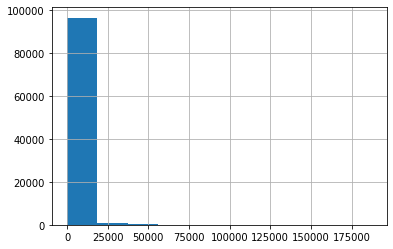

In [57]:
(df['total_cases']/1000).hist()

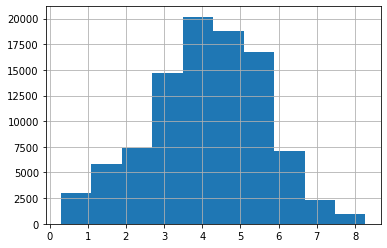

In [52]:
df['log_total_cases'] = df['total_cases'].apply(np.log10)
df[df['log_total_cases'] > 0]['log_total_cases'].hist()

#10^4 é o pico

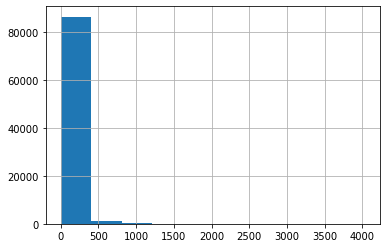

In [58]:
(df['total_deaths']/1000).hist()

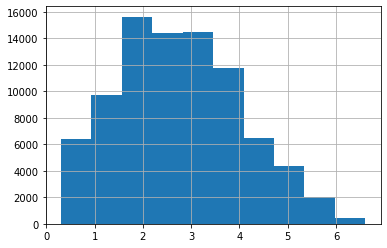

In [59]:
df['log_total_deaths'] = df['total_deaths'].apply(np.log10)
df[df['log_total_deaths'] > 0]['log_total_deaths'].hist()

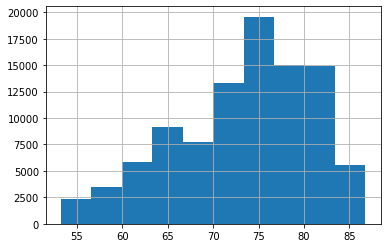

In [51]:
(df['life_expectancy']).hist()

## Estatísticas univariadas

In [62]:
print('Mean: ')
print(df[df['location'] == 'Brazil']['total_cases'].mean())

print('Median: ')
print(df[df['location'] == 'Brazil']['total_cases'].median())

print('Mode: ')
print(df[df['location'] == 'Brazil']['total_cases'].median())

Mean: 
6842158.029821074
Median: 
5566049.0
Mode: 
5566049.0


In [80]:
def est_univ(col_base, val_col_base, col_exp):
  print('Mean: ')
  print(df[df[col_base] == val_col_base][col_exp].mean())

  print('')

  print('Median: ')
  print(df[df[col_base] == val_col_base][col_exp].median())

  print('')

  print('Mode: ')
  print(df[df[col_base] == val_col_base][col_exp].median())

  print('')

  print('Variance: ')
  print(df[df[col_base] == val_col_base][col_exp].var())

  print('')

  print('STD: ')
  print(df[df[col_base] == val_col_base][col_exp].std())

  print('')

  print('Describe: ')
  print(df[df[col_base] == val_col_base][col_exp].describe())

In [81]:
est_univ('continent', 'South America', 'total_cases')

Mean: 
994673.7546022631

Median: 
133227.0

Mode: 
133227.0

Variance: 
6635247437927.267

STD: 
2575897.404386919

Describe: 
count    5.921000e+03
mean     9.946738e+05
std      2.575897e+06
min      1.000000e+00
25%      6.393000e+03
50%      1.332270e+05
75%      6.851070e+05
max      1.910697e+07
Name: total_cases, dtype: float64


In [83]:
# Intervalo interquartil
def IQR(df, column):
  return df[column].describe()[6] - df[column].describe()[4]

In [85]:
IQR(df, 'total_cases')

149526.0

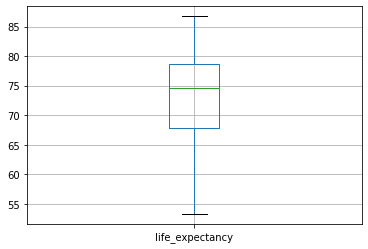

In [72]:
df.boxplot(column=['life_expectancy'])

# **Análise exploratória dos dados**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101998 entries, 0 to 101997
Data columns (total 60 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   iso_code                               101998 non-null  object 
 1   continent                              97230 non-null   object 
 2   location                               101998 non-null  object 
 3   date                                   101998 non-null  object 
 4   total_cases                            98192 non-null   float64
 5   new_cases                              98189 non-null   float64
 6   new_cases_smoothed                     97179 non-null   float64
 7   total_deaths                           87983 non-null   float64
 8   new_deaths                             88139 non-null   float64
 9   new_deaths_smoothed                    97179 non-null   float64
 10  total_cases_per_million                97670 non-null   

In [13]:
df['iso_code'] = df['iso_code'].astype('category')
df['continent'] = df['continent'].astype('category')
df['location'] = df['location'].astype('category')
df['date'] = df['date'].astype('category')
df['tests_units'] = df['tests_units'].astype('category')

In [16]:
df.dtypes

iso_code                                 category
continent                                category
location                                 category
date                                     category
total_cases                               float64
new_cases                                 float64
new_cases_smoothed                        float64
total_deaths                              float64
new_deaths                                float64
new_deaths_smoothed                       float64
total_cases_per_million                   float64
new_cases_per_million                     float64
new_cases_smoothed_per_million            float64
total_deaths_per_million                  float64
new_deaths_per_million                    float64
new_deaths_smoothed_per_million           float64
reproduction_rate                         float64
icu_patients                              float64
icu_patients_per_million                  float64
hosp_patients                             float64


In [14]:
df['continent'].cat.categories

Index(['Africa', 'Asia', 'Europe', 'North America', 'Oceania',
       'South America'],
      dtype='object')

In [15]:
df['iso_code'].cat.categories

Index(['ABW', 'AFG', 'AGO', 'AIA', 'ALB', 'AND', 'ARE', 'ARG', 'ARM', 'ATG',
       ...
       'VEN', 'VGB', 'VNM', 'VUT', 'WLF', 'WSM', 'YEM', 'ZAF', 'ZMB', 'ZWE'],
      dtype='object', length=231)

In [17]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN


In [21]:
df.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
101993,ZWE,Africa,Zimbabwe,2021-07-08,62383.0,2156.0,1594.571,2029.0,56.0,31.571,4197.222,145.059,107.285,136.514,3.768,2.124,1.64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12811.0,720873.0,48.501,0.862,8053.0,0.542,0.198,5.1,tests performed,1433578.0,848808.0,584770.0,34821.0,13088.0,9.65,5.71,3.93,881.0,53.7,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
101994,ZWE,Africa,Zimbabwe,2021-07-09,65066.0,2683.0,1771.857,2084.0,55.0,34.714,4377.738,180.516,119.213,140.215,3.700,2.336,1.63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1464065.0,875182.0,588883.0,30487.0,15907.0,9.85,5.89,3.96,1070.0,53.7,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
101995,ZWE,Africa,Zimbabwe,2021-07-10,66853.0,1787.0,1884.000,2126.0,42.0,38.143,4497.970,120.232,126.758,143.040,2.826,2.566,1.63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16878.0,NaN,NaN,NaN,1136.0,53.7,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
101996,ZWE,Africa,Zimbabwe,2021-07-11,67765.0,912.0,1898.714,2185.0,59.0,43.857,4559.331,61.361,127.748,147.010,3.970,2.951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1491397.0,895980.0,595417.0,NaN,18598.0,10.03,6.03,4.01,1251.0,53.7,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
101997,ZWE,Africa,Zimbabwe,2021-07-12,70426.0,2661.0,2058.857,2236.0,51.0,46.429,4738.367,179.036,138.523,150.441,3.431,3.124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1531868.0,926312.0,605556.0,40471.0,23205.0,10.31,6.23,4.07,1561.0,53.7,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN


In [22]:
df.shape

(101998, 60)

In [18]:
df.isnull().sum()

iso_code                                      0
continent                                  4768
location                                      0
date                                          0
total_cases                                3806
new_cases                                  3809
new_cases_smoothed                         4819
total_deaths                              14015
new_deaths                                13859
new_deaths_smoothed                        4819
total_cases_per_million                    4328
new_cases_per_million                      4331
new_cases_smoothed_per_million             5336
total_deaths_per_million                  14524
new_deaths_per_million                    14368
new_deaths_smoothed_per_million            5336
reproduction_rate                         19771
icu_patients                              91741
icu_patients_per_million                  91741
hosp_patients                             89262
hosp_patients_per_million               

# **Pré processamento**

Excluir as seguintes colunas, pois possuem de 80 à 90 porcento de seus dados ausentes.

In [25]:
df = df.drop(columns=['weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 
                      'icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million'])

In [31]:
# Exluir do dataset colunasc que possuem ao menos 70% dos dados ausentes
df = df.dropna(thresh=0.7*len(df), axis=1)

In [34]:
df.isnull().sum()

iso_code                               0
continent                           4768
location                               0
date                                   0
total_cases                         3806
new_cases                           3809
new_cases_smoothed                  4819
total_deaths                       14015
new_deaths                         13859
new_deaths_smoothed                 4819
total_cases_per_million             4328
new_cases_per_million               4331
new_cases_smoothed_per_million      5336
total_deaths_per_million           14524
new_deaths_per_million             14368
new_deaths_smoothed_per_million     5336
reproduction_rate                  19771
stringency_index                   16437
population                           656
population_density                  7263
median_age                         10944
aged_65_older                      11966
aged_70_older                      11447
gdp_per_capita                     10575
cardiovasc_death

In [33]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,597.029,9.59,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,597.029,9.59,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,597.029,9.59,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,597.029,9.59,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,597.029,9.59,0.5,64.83,0.511


In [35]:
print(df['total_cases'].mean())
print(df['total_cases'].median())

1105662.5528963662
14093.0
